# 모듈 불러오기

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#기본
import sys
import warnings
warnings.filterwarnings('ignore')
import os

# 전처리  
import numpy as np
import pandas as pd

# 시각화
from matplotlib.gridspec import GridSpec
from matplotlib import font_manager, rc
import missingno as msno
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import platform
import matplotlib

import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams["font.family"] = 'AppleGothic'
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams['axes.unicode_minus'] = False




# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']


# 데이터 불러오기

In [2]:
df = pd.read_csv("./실전db.csv")

In [3]:
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [4]:
temp1 = df.copy()

In [27]:
import datetime
import time 
def getDay_c(a,b,c):
    #리스트에 월 ~ 일까지 담아둠
    daylist = ['월', '화', '수', '목', '금', '토', '일']
    #datetime.date(2019,1,20).weekday() 
    #weekday() 라는 메소드의 반환 값은 월요일은 0, 화요일은 1 이므로
    #요일의 값이 리스트의 0번째 값인 daylist[0] = '월' 방식으로 가져온다.
    return daylist[datetime.date(a,b,c).weekday()]

pd.to_datetime(temp1["JOIN_DATE"])
y = int(temp1["JOIN_DATE"][0][:4])
m = int(temp1["JOIN_DATE"][0][5:7])
d = int(temp1["JOIN_DATE"][0][-2:])

y,m,d
ddd = getDay_c(y,m,d) 
  # 입력한 날'
print(f"입력 한 {y}.{m}.{d} 는 {ddd}요일 입니다.")


입력 한 2014.1.7 는 화요일 입니다.


In [32]:
pd.to_datetime(temp1["JOIN_DATE"])
temp1["weekend"] = ""
for i in range(len(temp1)):
    y = int(temp1["JOIN_DATE"][i][:4])
    m = int(temp1["JOIN_DATE"][i][5:7])
    d = int(temp1["JOIN_DATE"][i][-2:])
    ddd = getDay_c(y,m,d) 
    temp1["weekend"][i] = ddd

In [33]:
temp1.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,금
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,목
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,목
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,일


In [35]:
temp1.to_csv("./모두컴퍼니_weekend.csv")

In [55]:
temp2 = pd.read_csv("./모두컴퍼니_weekend.csv")
temp2.drop(["Unnamed: 0"],axis=1,inplace=True)
temp2.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,금
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,목
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,목
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,일


# 결측값 확인

In [56]:
temp2.isna().sum()

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
weekend       0
dtype: int64

# 상관성 분석

<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

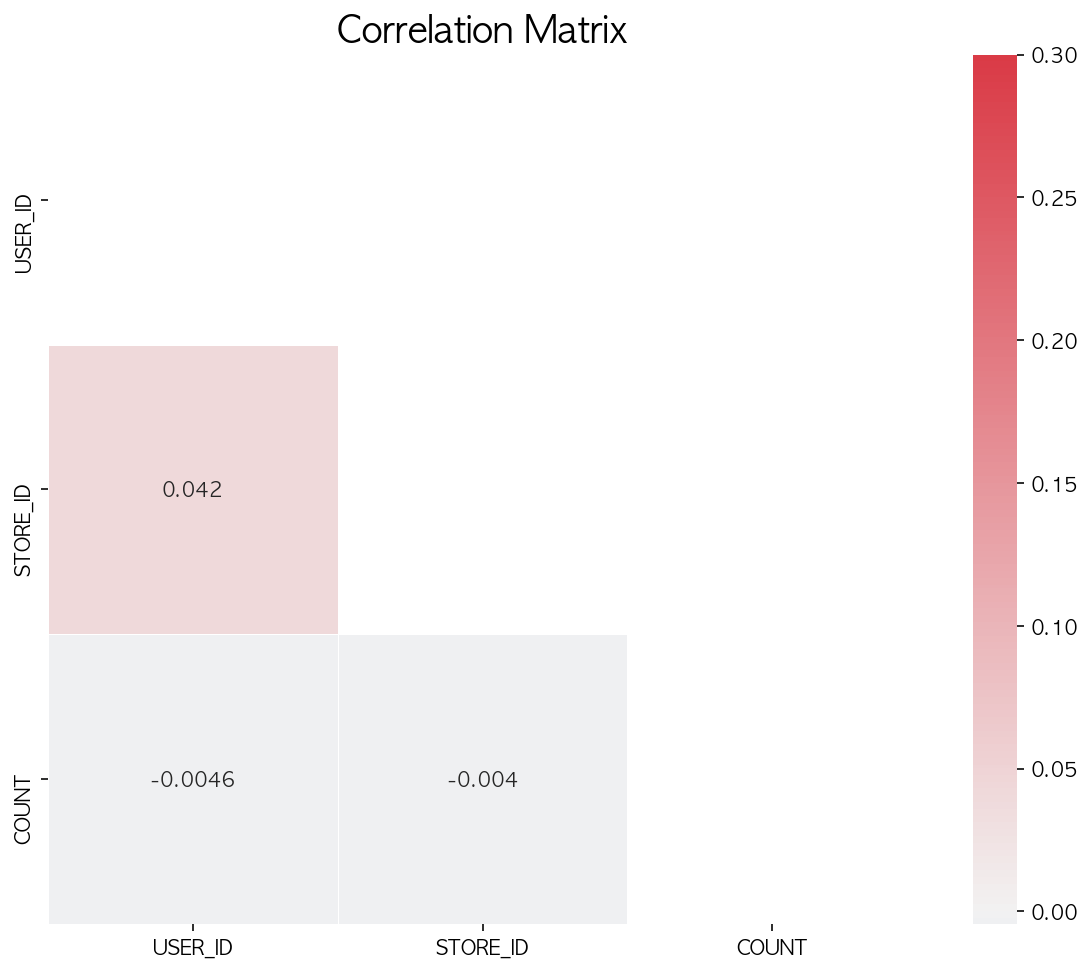

In [57]:
corr = temp2.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

# 데이터 확인

In [58]:
temp2.describe()

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


In [111]:
 temp2["year"] = temp2.apply(lambda x:x["DATE"][:4])
#  temp2["month"] = temp2["DATE"][5:7]
#  temp2["day"] = temp2["DATE"][-2:]
temp2


KeyError: 'DATE'

In [77]:
temp3=temp2.groupby(temp2["weekend"]).count().sort_values(by="weekend",axis=0,ascending=[["월","화","수","목","금","일"]])
temp3[["COUNT"]].head()

,COUNT
weekend,
금,135396
목,129435
수,128471
월,132002
일,98745


Text(0, 0.5, 'COUNT')

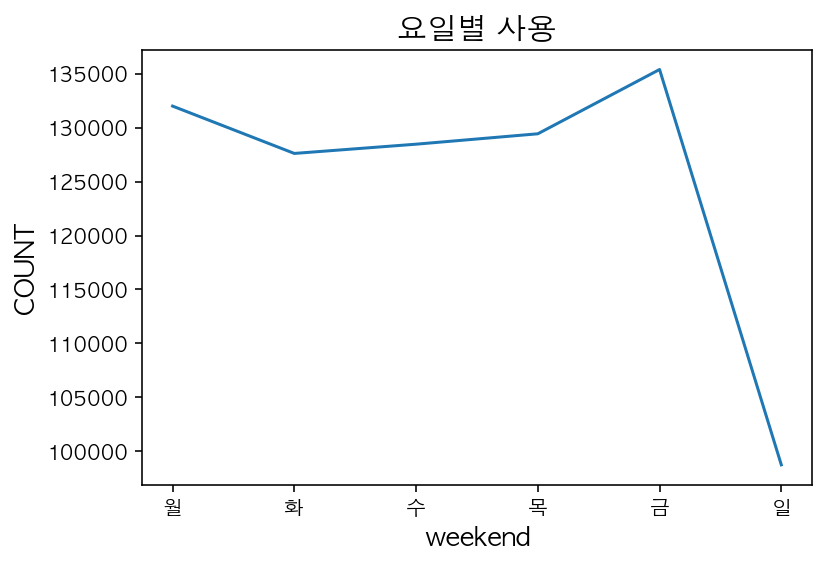

In [78]:
day_order = ["월","화","수","목","금","일"]
sns.lineplot(data=temp3.loc[day_order]["COUNT"])
plt.title("요일별 사용", fontsize=15)
plt.xlabel("weekend",fontsize=13)
plt.ylabel("COUNT",fontsize=13)

In [103]:
temp4 = temp2.groupby(temp2["weekend"]).count().sort_values(by=["weekend"],axis=0,ascending=[["월","화","수","목","금","일"]])
temp4 

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,year,month,day
weekend,,,,,,,,,,,
금,135396,135396,135396,135396,135396,135396,135396,135396,1,0,0
목,129435,129435,129435,129435,129435,129435,129435,129435,2,1,2
수,128471,128471,128471,128471,128471,128471,128471,128471,0,0,0
월,132002,132002,132002,132002,132002,132002,132002,132002,0,0,0
일,98745,98745,98745,98745,98745,98745,98745,98745,0,1,0
토,127608,127608,127608,127608,127608,127608,127608,127608,0,0,0
화,127614,127614,127614,127614,127614,127614,127614,127614,1,0,0
